In [1]:
import gensim
import pyLDAvis
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pyLDAvis import gensim as gs
from ast import literal_eval

Load the model, corpus, dictionary and data

In [2]:
model = gensim.models.LdaModel.load('models/model_rs24k36')
with open('models/corpus.pkl', 'rb') as f:
    corpus = pickle.load(f)
dictionary = gensim.corpora.dictionary.Dictionary.load('models/dictionary')
df = pd.read_csv('data/data_for_interpretation.csv', usecols=["scopusId", "title", "keywords", "abstract", "data", "data_preprocessed", "modularity_class"])
df['data_preprocessed'] = df['data_preprocessed'].apply(literal_eval)

Show the topics

In [3]:
model.show_topics(formatted=False, num_topics=36)

[(0,
  [('key', 0.049468704),
   ('scheme', 0.045470588),
   ('authentication', 0.044410434),
   ('protocol', 0.041731816),
   ('security', 0.034210272),
   ('proposed', 0.019939747),
   ('attack', 0.018052917),
   ('secure', 0.017450253),
   ('communication', 0.017217262),
   ('based', 0.01604209)]),
 (1,
  [('mobile', 0.1372106),
   ('user', 0.05035642),
   ('device', 0.047657304),
   ('application', 0.03247947),
   ('apps', 0.02791521),
   ('privacy', 0.023532886),
   ('phone', 0.02311384),
   ('app', 0.018381953),
   ('smartphone', 0.014519994),
   ('android', 0.014278079)]),
 (2,
  [('data', 0.05284731),
   ('network', 0.050072487),
   ('node', 0.04897447),
   ('sensor', 0.040671606),
   ('privacy', 0.035138022),
   ('wireless', 0.033458125),
   ('aggregation', 0.023600155),
   ('distributed', 0.023301486),
   ('source', 0.015678404),
   ('scheme', 0.014453741)]),
 (3,
  [('technology', 0.04431653),
   ('government', 0.013903057),
   ('issue', 0.013824167),
   ('information', 0.01

Generate and show a pyLDAvis visualisation for easy exploration

In [4]:
pyLDAvis.enable_notebook()
vis = gs.prepare(model, corpus, dictionary)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
27     0.207051 -0.026598       1        1  4.311970
28     0.146928 -0.036736       2        1  4.257953
13    -0.082994 -0.150907       3        1  4.184219
34    -0.025864 -0.135775       4        1  4.070367
16     0.022292  0.043836       5        1  3.946796
15     0.060359  0.096282       6        1  3.936129
18     0.172220 -0.024080       7        1  3.625497
3      0.166162  0.108867       8        1  3.602090
10     0.221903 -0.018830       9        1  3.571915
5     -0.113089  0.020808      10        1  3.474121
0     -0.193582  0.048359      11        1  3.467124
6      0.148579 -0.000913      12        1  3.355811
29     0.134611  0.031702      13        1  2.959225
17    -0.182591 -0.078458      14        1  2.908702
25    -0.084427 -0.067352      15        1  2.797513
31     0.048822 -0.071131      16        1  2.650089
19    -0.072913 -0.042859      17        1  2.636641
12    -0.168497 -0.041026      18        1  2.622081
22    -0.065594 -0.102017      19        1  2.520835
20     0.001063 -0.108506      20        1  2.496517
4      0.181655 -0.066696      21        1  2.486007
8     -0.077915  0.058394      22        1  2.465691
9     -0.023678  0.120685      23        1  2.373885
26    -0.028769  0.189640      24        1  2.260319
21    -0.104105  0.101226      25        1  2.159138
7      0.095515 -0.071234      26        1  2.115552
24    -0.046876  0.044821      27        1  2.111223
1      0.022296  0.053143      28        1  2.104182
2     -0.143183 -0.015808      29        1  1.975647
14     0.094590 -0.042385      30        1  1.969665
11    -0.008483  0.073404      31        1  1.952343
35    -0.029649  0.053274      32        1  1.894468
30    -0.081165  0.018224      33        1  1.854834
33    -0.078732 -0.128459      34        1  1.815776
32    -0.015476  0.091556      35        1  1.580750
23    -0.096462  0.075549      36        1  1.484924, topic_info=            Term           Freq          Total Category  logprob  loglift
13          data  165820.000000  165820.000000  Default  30.0000  30.0000
391        cloud   40789.000000   40789.000000  Default  29.0000  29.0000
33   information   82814.000000   82814.000000  Default  28.0000  28.0000
109      network   50207.000000   50207.000000  Default  27.0000  27.0000
786       mobile   26546.000000   26546.000000  Default  26.0000  26.0000
..           ...            ...            ...      ...      ...      ...
52         paper     971.017853   47810.419480  Topic36  -4.7974   0.3132
5    application     809.991884   32532.156482  Topic36  -4.9787   0.5168
8          based     964.803880   67167.041068  Topic36  -4.8038  -0.0332
191      problem     652.001824   22792.697240  Topic36  -5.1957   0.6557
187          new     611.393552   25134.668016  Topic36  -5.2600   0.4935

[1879 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
1615     10  0.007390         abe
1615     18  0.991623         abe
1955      1  0.080445  acceptance
1955      2  0.000800  acceptance
1955      5  0.028416  acceptance
...     ...       ...         ...
806      29  0.001324        zero
806      32  0.000662        zero
806      33  0.019865        zero
806      34  0.002649        zero
806      35  0.004635        zero

[27019 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[28, 29, 14, 35, 17, 16, 19, 4, 11, 6, 1, 7, 30, 18, 26, 32, 20, 13, 23, 21, 5, 9, 10, 27, 22, 8, 25, 2, 3, 15, 12, 36, 31, 34, 33, 24])

Loop through all the documents to infer document-topics distribition

In [5]:
def inf_dist(text):
          
    bow = model.id2word.doc2bow(text)
    topics = model.get_document_topics(bow, per_word_topics=False)

    dic_topics = {}
    for t in topics:
        dic_topics[t[0]] = float(t[1])

    return dic_topics
      
df["document_topic_distribution"] = df["data_preprocessed"].map(inf_dist)

Loop trought all documents and classify with a main topic

In [6]:
def main_topic(text):
    
    highest_key = -1
    highest_value = -1
    
    for k in text.keys():
        if text[k] > highest_value:
            highest_key = k
            highest_value = text[k]
    
    return highest_key

df["main_topic"] = df["document_topic_distribution"].map(main_topic)

Add a column with the proportion of the main topic

In [7]:
def main_topic_value(text):
    
    highest_key = -1
    highest_value = -1
    
    for k in text.keys():
        if text[k] > highest_value:
            highest_key = k
            highest_value = text[k]
    
    return highest_value

df["main_topic_value"] = df["document_topic_distribution"].map(main_topic_value)

Make a dataframe with individual columns for each topic and community (modularity class) for easy correlation computation

In [8]:
topic_dicts = [{} for topic in range(36)]

# make dict of values for eacht topic
for i, topic_dict in enumerate(topic_dicts):
    
    for j, topic_distribution in enumerate(df['document_topic_distribution']):
        try:
            value = topic_distribution[i]
        except:
            value = 0
        
        topic_dicts[i][j] = value 

topic_per_paper = pd.DataFrame(topic_dicts).transpose()
topic_per_paper.columns = ['Topic ' + str(i) for i in range(36)]

Show a heatmap of topic occurence correlation

In [9]:
topic_correlations = topic_per_paper.corr()
topic_names = ['Cryptography','Mobile device','Networks','Government IT','Genetics','Cloud storage','Big data','Personal privacy risks','Network security','Cloud computing','Social media use','Monitoring devices','Signature','Privacy algrorithms','Office design','Software design','Web services','Encryption','Consumer perception','Location','Privacy-preserving controls','Vehicular ad hoc networks (and aes)','Machine learning','RFID','Application security','Privacy-preserving protocols','Internet of things','Healthcare','Legal','Patient data','Biometrics','Social networks','Smart grid','Databases','Data mining','Peer-to-peer networks']
topic_names = [string.lower() for string in topic_names]
f, ax = plt.subplots(figsize=(22, 16), dpi = 480)
mask = np.triu(np.ones_like(topic_correlations, dtype=bool))
triangle = sns.heatmap(topic_correlations, cmap=sns.color_palette("vlag_r", as_cmap=True), center = 0, annot=True, mask = mask, fmt='.2f', xticklabels=topic_names, yticklabels=topic_names)
triangle.get_figure().savefig('triangle.png', bbox_inches='tight')
triangle

<AxesSubplot:>

Count communities and sort by occurence to macht with the right labels

In [10]:
communities = {}

for module in df['modularity_class']:
    
    if module in communities.keys():
        communities[module] += 1
    else:
        communities[module] = 1
        
sorted_values = sorted(communities.values(), reverse = True) 

sorted_communities = {}

for i, value in enumerate(sorted_values):
     for k in communities.keys():
        if communities[k] == value:
            sorted_communities[k] = communities[k]
            
names = ['idividual privacy and law', 'cloud computing', 'e-health and medical data', 'data mining', 'genetic data', 'location data', 'anonymity metrics', 'internet of things', 'differential privacy', 'electronic voting', 'networking', 'cybersecurity', 'mobile devices and apps', 'system architecture and design', 'vehicular ad hoc networks', 'RFID', 'social media', 'physical privacy (various)', 'biometrics', 'smart grid'] 
keys = [key for key in sorted_communities.keys()]

communities = {}

for i in range(len(names)):
    communities[str(keys[i])] = (names[i], sorted_communities[keys[i]])

communities

{'177': ('idividual privacy and law', 11768),
 '695': ('cloud computing', 8914),
 '1234': ('e-health and medical data', 5636),
 '273': ('data mining', 5496),
 '279': ('genetic data', 4596),
 '757': ('location data', 4541),
 '58': ('anonymity metrics', 3909),
 '637': ('internet of things', 3706),
 '282': ('differential privacy', 3383),
 '413': ('electronic voting', 3249),
 '277': ('networking', 2969),
 '224': ('cybersecurity', 2953),
 '313': ('mobile devices and apps', 2312),
 '813': ('system architecture and design', 2283),
 '708': ('vehicular ad hoc networks', 1982),
 '1208': ('RFID', 1837),
 '274': ('social media', 1734),
 '458': ('physical privacy (various)', 1703),
 '865': ('biometrics', 1672),
 '880': ('smart grid', 1265)}

Compute the averate presence of each topic for each community (modularity class)

In [11]:
topic_per_paper_with_community = pd.concat([df['modularity_class'], topic_per_paper], axis=1)
topical_distr_per_community = {}

for key in communities:        
    
    entries = topic_per_paper_with_community[topic_per_paper_with_community['modularity_class'] == int(key)]        
                
    averages = {}
    
    for topic in ['Topic ' + str(i) for i in range(36)]:
        averages[topic] = entries[topic].mean()

    topical_distr_per_community['Modularity class ' + str(key)] = averages
    
topical_distr_per_community_df = pd.DataFrame(topical_distr_per_community).transpose()

Create a heatmap to visualise average occurance of a topic within each community

<AxesSubplot:>

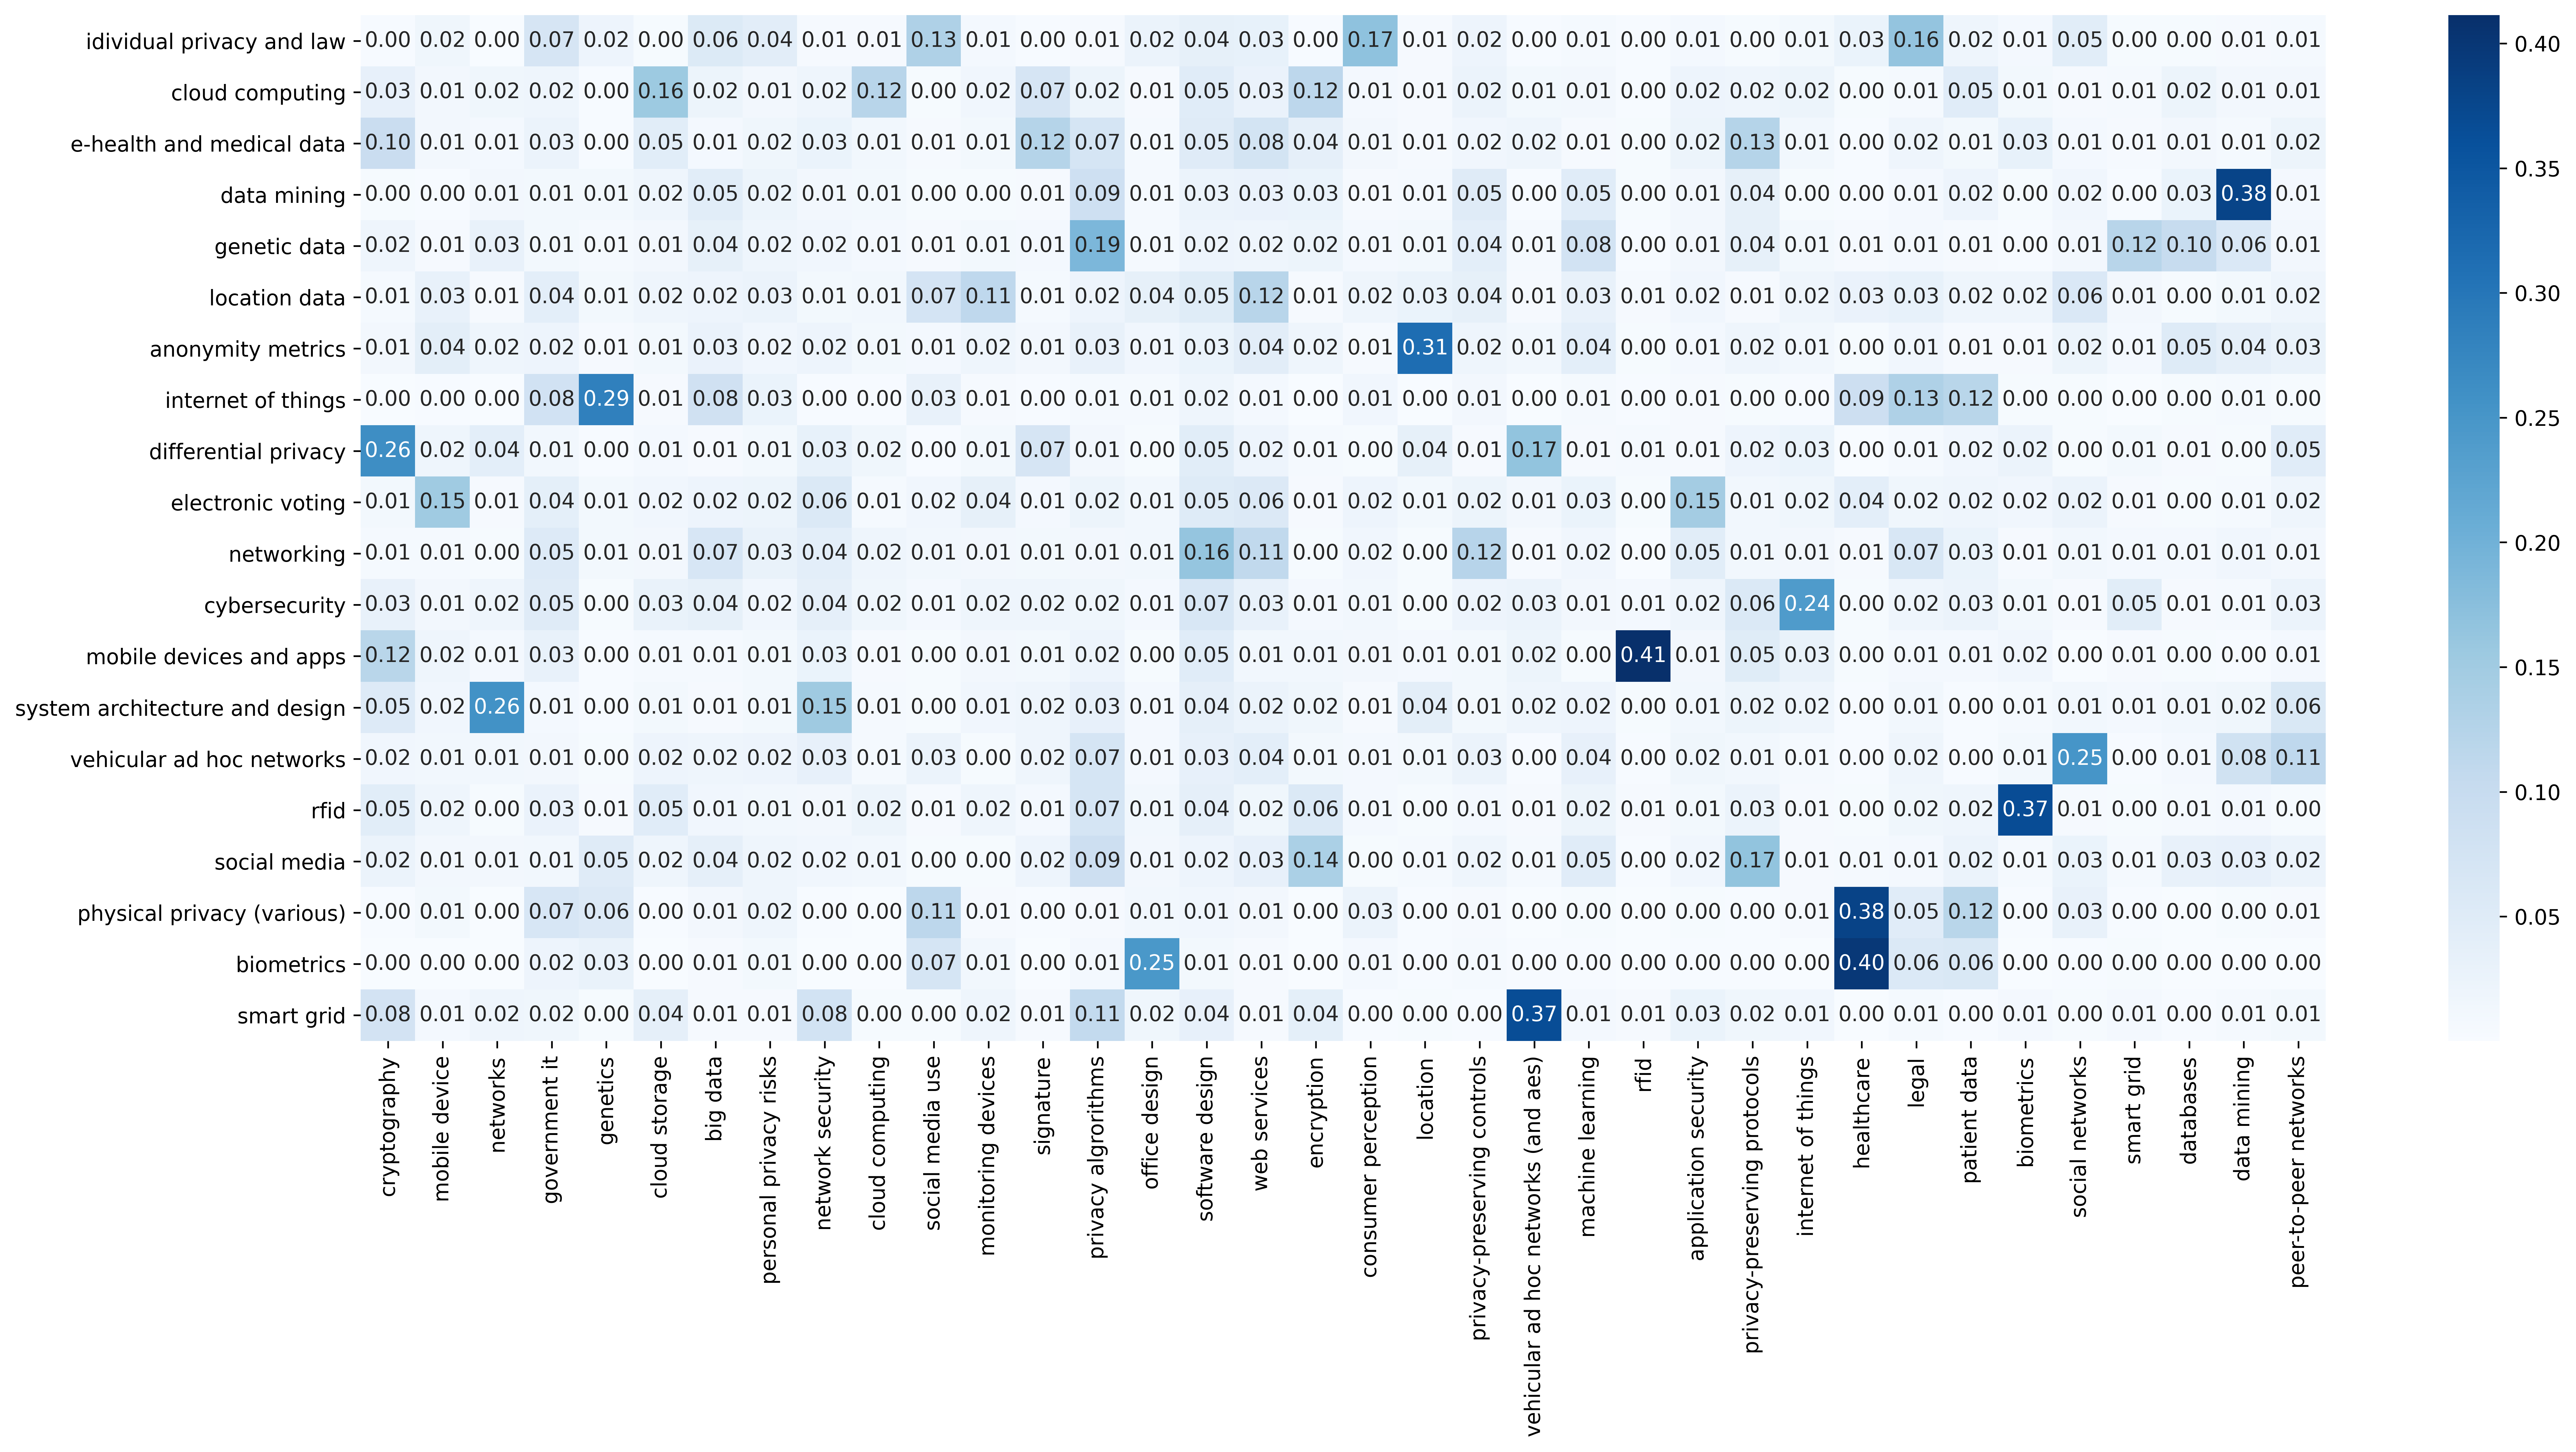

In [12]:
community_names = [value[0].lower() for value in communities.values()]
f, ax = plt.subplots(figsize=(21, 9), dpi = 480)
square = sns.heatmap(topical_distr_per_community_df, cmap=sns.color_palette("Blues", as_cmap=True), annot=True, fmt='.2f', xticklabels=topic_names, yticklabels=community_names)
square.get_figure().savefig('square.png', bbox_inches='tight')
square